 # Sprint 1

Develop a very simple predictor of risk by loading data, doing exploratory data analysis, cleaning data  and eventually a simple classifier with logistic regression.

1. Load all the necessary libraries and set-up environment
2. Load the data
3. Explore data – what types, any obvious issues
4. Run mechanical feature engineering
5. Split data 
6. Run logistic regression
7. Explore coefficients
8. Deep dive on the most predictive data
9. Clean-up data
10. Re-run logistic regression



## 1.1 Load all the necessary libraries and set-up environment


In [1]:
%%javascript
// Ensure our output is sufficiently large
IPython.OutputArea.auto_scroll_threshold = 9999;


<IPython.core.display.Javascript object>

In [2]:
# Emnsure all charts plotted automatically
%matplotlib inline

In [5]:
import warnings
import numpy as np
import pandas as pd
#make sure it doesn't truncate too much
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import sklearn
import sklearn.linear_model

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc

from sklearn_pandas import DataFrameMapper
from sklearn import preprocessing

from xgboost import XGBClassifier

from IPython.display import display, Markdown

import matplotlib.pyplot as plt
import seaborn as sns

__You should see:__

Nothing, if anything went wrong (i.e. errors), you need to install additional libraries 

## 1.2. Load the data

* You load the CSV file (Credit_Card.csv) into a Pandas object. Name this Pandas object df_raw_data

* Print out top 10 rows just to make sure we got it all and understand what's in the data

In [6]:
# Solution
df_raw_data = pd.read_csv('Credit_Card.csv', sep=',', header=0)


df_raw_data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,24242.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,1
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


__You should see:__

10 rows of data across all 25 columns (different variables)

__Helpful  decoder ring for what each variable means (stuff you would get from the client)__

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ...8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

## 1.3. Explore the data

* Examine all the columns to:
 * Determine what needs mechanical transformation (one-hot, normalization) before we can run it into the Logistic Regressioon
 * Check for obvious data issues:
  * nan and missing data
  * outliers
 
* We can do all of these by doing two things:
 * Examining column type (e.g. string, float, int) - you can do this by examining dtypes attribute of the dataframe
 * For floats and ints - doing histograms (e.g. using matplotlib)
  * You could do it one by one or make it automatic in some way (e.g. for loop)
 

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

'Any nans: False'

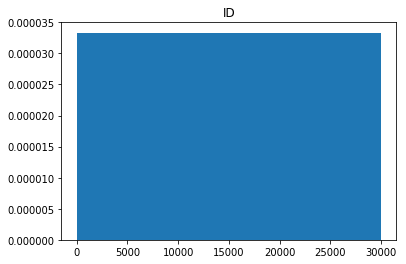

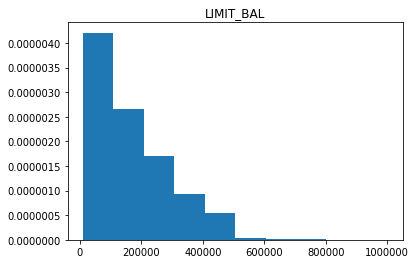

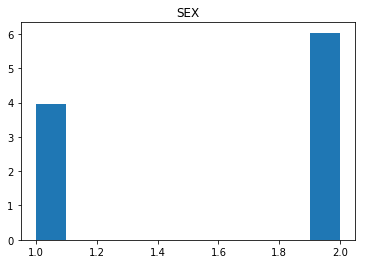

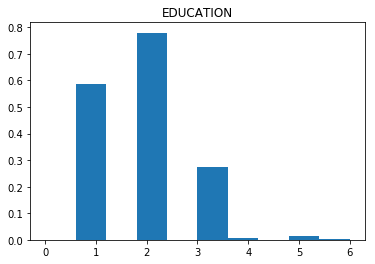

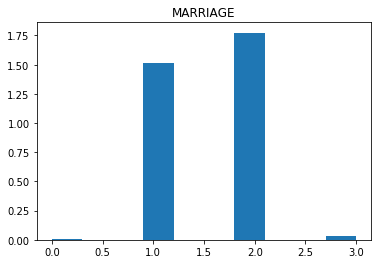

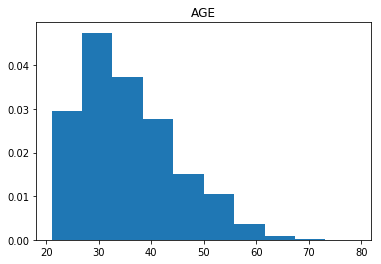

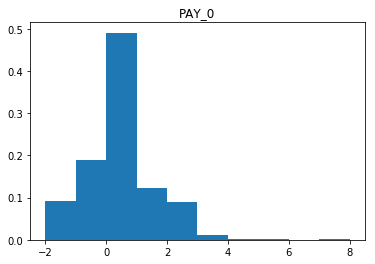

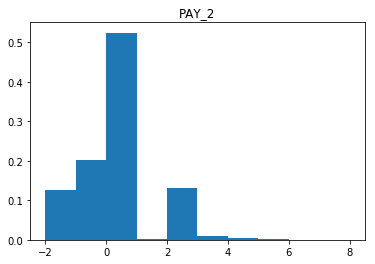

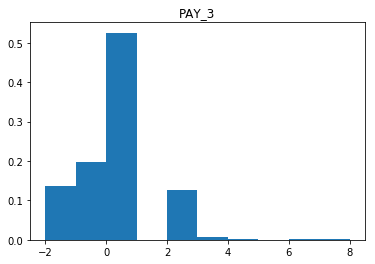

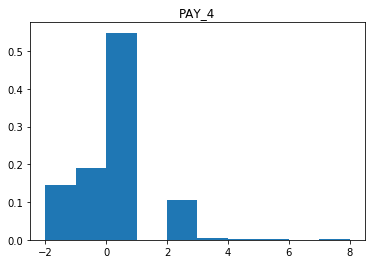

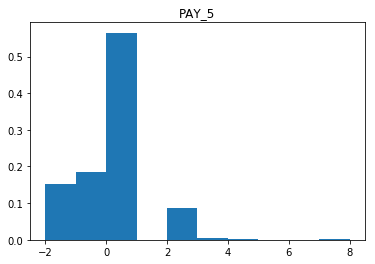

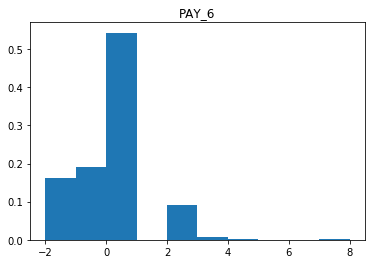

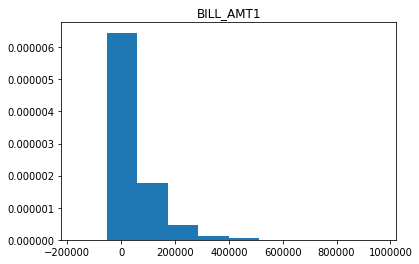

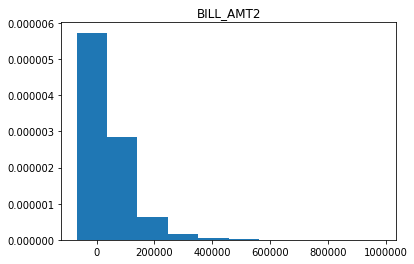

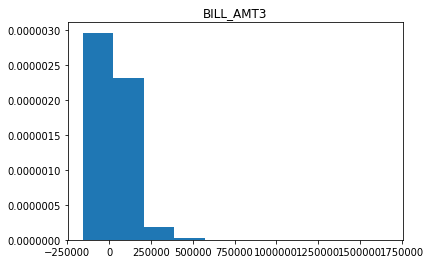

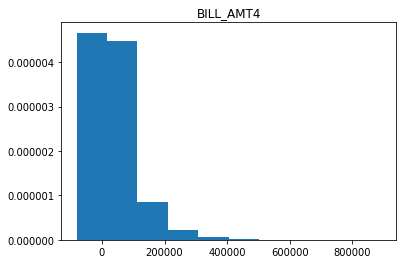

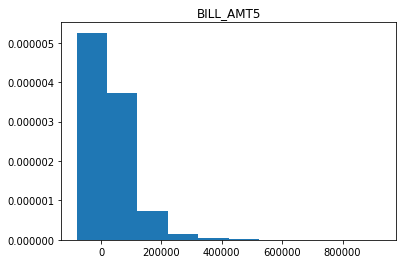

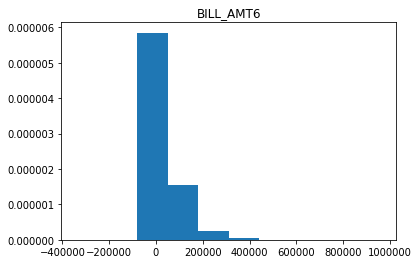

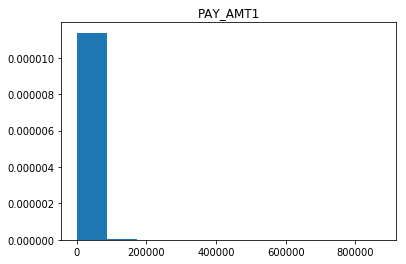

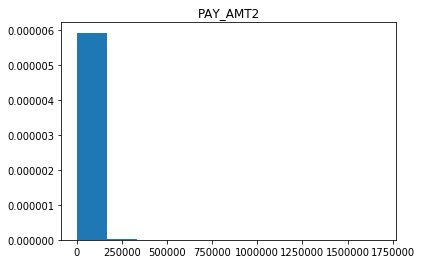

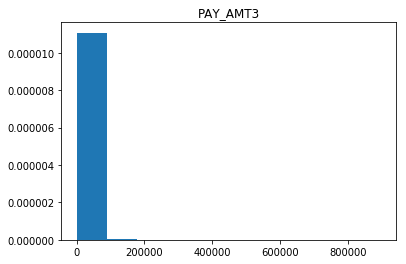

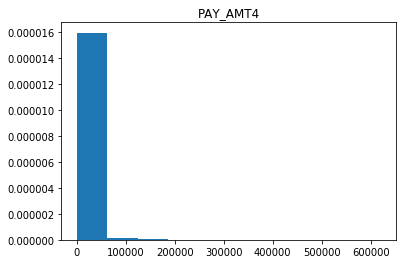

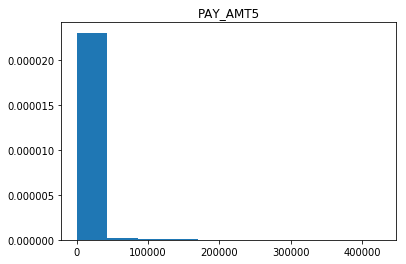

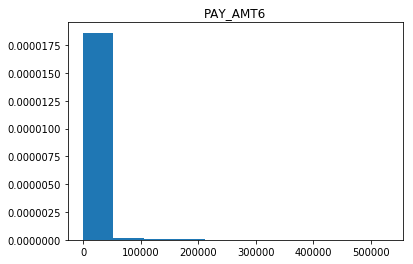

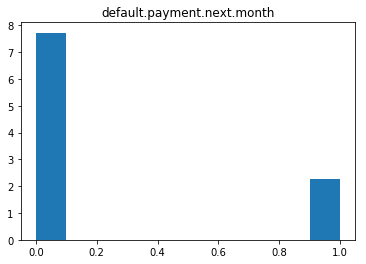

In [7]:
#display column variale types
display(df_raw_data.dtypes)

#check for nans
display(f"Any nans: {df_raw_data.isnull().values.any()}")

#since every variable is a number, we can simply plot histogram of each,
#if this was not the case we'd want to first make all string into numerical representaion first
for df_column in df_raw_data.columns:
    plt.hist(df_raw_data[df_column], density = True)
    plt.title(df_column)
    plt.show()

___What you should see___:
* All data is already numerical
* Data is complete: no nan values
* There appear to be no outliers
* Some variables should be encoded as one-hot

## 1.4. Run Mechanical Feature Engineering

* Create DataFrameMapper class and assign every column you want to use as feature or output a processing function
 * You should probably use either StandardScaler (normalizes) or LabelBinarizer (one hot) from preprocessing db
* Fit and trasform your DataFrameMapper and save output into numpy_fe numpy array
* Optional: feed numpy_fe array into df_fe data frame (you can get column names from your DataFrameMapper object via attribute transformed_names_)
* Display first 10 rows for df_fe pandas frame

In [7]:
# Assigning every column a transformation, except for PAY_X, since they're already ordinal and we're ok with that
# you'll notice we're not transforming ID (by not including it on the list) , since this can't have any value as a signal

pipeline_mapper = DataFrameMapper([
    (['LIMIT_BAL'], preprocessing.StandardScaler()),
    (['SEX'], preprocessing.LabelBinarizer()),
    (['EDUCATION'], preprocessing.LabelBinarizer()),
    (['MARRIAGE'], preprocessing.LabelBinarizer()),
    (['AGE'], preprocessing.StandardScaler()),
    (['PAY_0'], None),  
    (['PAY_2'], None),  
    (['PAY_3'], None),  
    (['PAY_4'], None),  
    (['PAY_5'], None),  
    (['PAY_6'], None),  
    (['BILL_AMT1'], preprocessing.StandardScaler()),
    (['BILL_AMT2'], preprocessing.StandardScaler()),
    (['BILL_AMT3'], preprocessing.StandardScaler()),
    (['BILL_AMT4'], preprocessing.StandardScaler()),
    (['BILL_AMT5'], preprocessing.StandardScaler()),
    (['BILL_AMT6'], preprocessing.StandardScaler()),
    (['PAY_AMT1'], preprocessing.StandardScaler()),
    (['PAY_AMT2'], preprocessing.StandardScaler()),
    (['PAY_AMT3'], preprocessing.StandardScaler()),
    (['PAY_AMT4'], preprocessing.StandardScaler()),
    (['PAY_AMT5'], preprocessing.StandardScaler()),
    (['PAY_AMT6'], preprocessing.StandardScaler()),
])

print(pipeline_mapper)

# transform columns from df_raw_Ddata into numpy_fe array according to our pipeline recipe above
numpy_fe_features = pipeline_mapper.fit_transform(df_raw_data)

# get list of features from our feature engineered data-frame
FEATURES = pipeline_mapper.transformed_names_

#OPTIONAL - create new dataframe with transformed variables (in case we want to use it to examine data)
# df_fe = pd.DataFrame(data=numpy_fe, columns=FEATURES)

display(numpy_fe_features.shape)
display(numpy_fe_features[0:5])

DataFrameMapper(default=False, df_out=False,
        features=[(['LIMIT_BAL'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['SEX'], LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)), (['EDUCATION'], LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)), (['MARRIAGE'], LabelBinarizer(neg_label=0, pos_label=1, spars...ean=True, with_std=True)), (['PAY_AMT6'], StandardScaler(copy=True, with_mean=True, with_std=True))],
        input_df=False, sparse=False)


C:\ML\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ML\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(30000, 32)

array([[-1.13672015,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        , -1.24601985,  2.        ,
         2.        , -1.        , -1.        , -2.        , -2.        ,
        -0.64231675, -0.64740314, -0.66799923, -0.67275694, -0.66305853,
        -0.65272422, -0.34192533, -0.22708681, -0.29682028, -0.31220477,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        , -1.02904717, -1.        ,
         2.        ,  0.        ,  0.        ,  0.        ,  2.        ,
        -0.36614422, -0.66675104, -0.63925926, -0.62188958, -0.60622927,
        -0.59796638, -0.34192533, -0.21358883, -0.2400236 , -0.24729522,
        -0.31413612, -0.18087821],
       [-0.59720239,  1.        ,  0.        ,  0.    

__What you should see__:

* 32 columns, since we hot-encoded a few
* a few rows of data
* continous variables (e.g. LIMIT_BAL) will have a normalized number, many will be just 0 or 1 (i.e. one-hot)

### Engineer data: Split data 

The idea here is to just feed it into ML algorithm and see how good the prediction is out of the box

  ## 1.5. Split the data
  
* Define what columns are features we want to use and what is target (i.e. default)
* Check what share is in default vs not is entire data-set

* Split data- our data-set un-balanced (i.e. there is much more category `0` (not defaulted) than `1` (defaulted). We need to:
 * stratify on target - this guarantees that the splitted data has the same distribution of `0` and `1`
 * we set our _random state_ to ensure that we can replicate our split
 * we will keep 20% for test
 * use X_train, X_test, y_train, y_test variable convention

* Check that share of default vs not is same in test and train set as original
 

In [7]:
# We use capitals for constant variables
TARGET = 'default.payment.next.month'

#create numpy target 
numpy_target = df_raw_data[TARGET].values

#Original distribution
display("Orginal distribution")
display(pd.Categorical(df_raw_data[TARGET]).describe())

# The function train_test_split, splits the arguments into two sets.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    numpy_fe_features, numpy_target, test_size=0.2, random_state=42, stratify=numpy_target)

# Lets verify that our splitting has the same distribution
display("Split in training set")
display(pd.Categorical(y_train).describe())
display("Split in test set")
display(pd.Categorical(y_test).describe())

'Orginal distribution'

,counts,freqs
categories,,
0,23171,0.772367
1,6829,0.227633


'Split in training set'

,counts,freqs
categories,,
0,18537,0.772375
1,5463,0.227625


'Split in test set'

,counts,freqs
categories,,
0,4634,0.772333
1,1366,0.227667


___What you should see___:

* Original distribution has 77% to 23% share of non-default to default
* Train and test set have same split
* 24,000 entries in train set and 6,000 in test set

## 1.6. Develop model: Train and test logistic regression
To train and test the base-line model we look at the type of prediction problem we are dealing with. The target is 0 or 1 which is a binary variable. 
As such our algorithm needs to be able to predict this. A logistic regression is an algorithm that allows to predict binary variable. 

*Note for statistics geeks only: The implementation of the algorithm in Python's scikit-learn is not based on ordinary least square or maximum likelihood estimator, which would be the case in R or SAS. SciKit learn implementation penalizes complexity (i.e. regularizes)

___Steps___:
* Create linear_model object
* Train (i.e. fit) model using X_train and y_train
* Use predict to predict target for unseen data (test) - call that output y_hat_test
 * test set y_hat_test
* Display accuracy
* Display au_roc 
* Display confusion matrix

In [8]:
# Run Logistic Regression Training
linear_model = sklearn.linear_model.LogisticRegression(random_state=42)
linear_model.fit(X_train, y_train)


display(Markdown('###### Performance on test set'))
#create prediciton
y_hat_test = linear_model.predict(X_test)
y_hat_test_proba = linear_model.predict_proba(X_test)

# Accuracy
lr_accuracy = sklearn.metrics.accuracy_score(y_test, y_hat_test)
display('Linear model test set accuracy: {:.4f}'.format(lr_accuracy))
display(Markdown('Linear model predicion distribution:'))
display(pd.Categorical(y_hat_test).describe())

# AuRoc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test_proba[:,1])
AuROC = sklearn.metrics.auc(false_positive_rate, true_positive_rate)
display(Markdown('\n\nauROC is: {:.2f}'.format(AuROC * 100)))

# Confusion matrix
display(pd.DataFrame(confusion_matrix(y_test, y_hat_test), 
             columns=['Predicted Not Default', 'Predicted to Default'],
             index=['Actual Not Default', 'Actual Default']))


C:\ML\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###### Performance on test set

'Linear model test set accuracy: 0.8307'

Linear model predicion distribution:

,counts,freqs
categories,,
0,5258,0.876333
1,742,0.123667




auROC is: 82.25

,Predicted Not Default,Predicted to Default
Actual Not Default,4438,196
Actual Default,820,546


__What you should see:__

* You should see Logistic regression accuracy is at ~80% 
 * This is very close to frequency of non-defaults (77%)
* If you look at distribution of predicitons you will see that only 12% of the time it guesses default (vs 23% in the population)
 * In other words, it's  saying for ~90% of unseen samples, it's just going for safe bet of saying they won't default
 
* auROC measure is 82 which is pretty good actually

* This is pretty good performance on the first try, but we should dig deeper to make sure data we're using is solid 


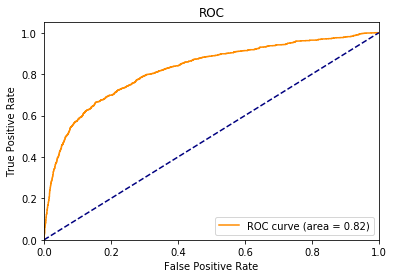

In [9]:
#ROC chart
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', label='ROC curve (area = %0.2f)' % AuROC)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

___What you should see:__

* RoC curve, with AuROC displayed
* Nothing terribly suspicious here - it stays a little too close to the Y-axis wall, but otherwise OK

## 1.7. Exploring the coeficients

Idea here is to see what the model picked-up to get better understanding why it's having a hard time in predicting defaults. It could be coomplex data relationship or maybe data is not very clean. We'll do two things here:

___Steps:___

* Get logistic regression coeficients (stored in your linear model object under attribute coef_[0])
* Sort coefficients from smallest (not default signals) to biggest (default signal)

In [10]:
# get intercept
# intercept = linear_model.intercept_

# Get coefficients (same order as features fed into Logistic Regression) and build table
# put it in a nice dataframe and sort from most impact to least, sicne raw print-out is ugly
named_coefs = pd.DataFrame({
    'features': FEATURES,
    'coeficients': linear_model.coef_[0]
}).sort_values('coeficients')

display(named_coefs)

,features,coeficients
9,MARRIAGE_0,-1.161863
21,BILL_AMT2,-0.787341
2,EDUCATION_0,-0.716659
6,EDUCATION_4,-0.397074
7,EDUCATION_5,-0.387071
27,PAY_AMT2,-0.369859
0,LIMIT_BAL,-0.351256
26,PAY_AMT1,-0.288632
11,MARRIAGE_2,-0.208339
23,BILL_AMT4,-0.173352


___You should see___:
* Coefficients with weights:

* Most likely to lead to not defaulting
 * MARRIAGE_0 - unlcear what this means, our dictionary says 1,2, 3 are proper values - odd
 * BILL_AMT2 - very odd, why the bigger your bill the less likely you are to default?
 * EDUCATION_0,4,6 - very odd again - all of these are undefined values
 * PAY_AMT2 - the more you pay the less likely to defualt - makes sense
 * LIMIT_BAL - folks wil large credit default less - we probably do a good job of increasig creditr limit

* Most likely to lead to defaulting:
 * EDUCATION_1 - having grad school degree - weird
 * PAY_3 - the more late bills you had 3 months ago the more likeley to default - makes sense
 * AGE - older defaults more often - weird!
 * PAY_0 - the more late bills you have more recently, the more likely to default - makes sense
 * BILL_AMT1 - the bigger most recent bill the more likely to default
 
 
* Overall - much of this stuff seems odd:
 * Could be data is dirty
 * Could be we have lots of colinearity that's confusing it - maybe we drop variables
 * Could be Logistic Regression has a hard time when data not properly data engineered
 * Could be a very nuanced signal that is not linear (so will need a different ML approach)

## 1.8 Deep Dive into Data

__A few ideas based on above:__

* Biographic (all are either postively or negatively predictive) - let's simply look at cross-tabs
 * Gender
 * Education
 * Age (probably good idea to bin into 20s, 30s, 40s, 50s, etc.)
 * Marital status
 
* Simple Behavioral
 * Ammount of dollars owned (BILL_AMT)
 * Number of payments late (PAY_X) - let's look at most recent (PAY_0), since most predictive
 
* Statistics  check:
 * Make sure we don't have a ton of co-linearity: 
  * PAY_X most likely at fault
 
 __We'll use df_raw_data (vs feature engineered numpy array) as pandas more user friendly__
 

In [11]:
display(Markdown('##### Gender'))
display(pd.crosstab(df_raw_data['SEX'],df_raw_data['default.payment.next.month'],normalize='index',margins=True))

display(Markdown('##### Education'))
display(pd.crosstab(df_raw_data['EDUCATION'],df_raw_data['default.payment.next.month'],normalize='index',margins=True))

display(Markdown('##### Marital status'))
display(pd.crosstab(df_raw_data['MARRIAGE'],df_raw_data['default.payment.next.month'],normalize='index',margins=True))
display(pd.crosstab(df_raw_data['MARRIAGE'],df_raw_data['default.payment.next.month'],margins=True))


display(Markdown('##### Age'))
age_bins = [df_raw_data['AGE'].min(), 30, 40, 50, 60, 70, df_raw_data['AGE'].max()]
df_raw_data['AgeBin'] = pd.cut(df_raw_data['AGE'], age_bins,include_lowest=True).astype(str)

display(pd.crosstab(df_raw_data['AgeBin'],df_raw_data['default.payment.next.month'],normalize='index',margins=True))
display(pd.crosstab(df_raw_data['AgeBin'],df_raw_data['default.payment.next.month'],margins=True))

display(Markdown('##### Last Bill Ammount'))
display(df_raw_data.groupby('default.payment.next.month')['BILL_AMT1'].describe())

display(Markdown('##### Last Pay Ammount'))
display(df_raw_data.groupby('default.payment.next.month')['PAY_AMT1'].describe())


display(Markdown('##### Payment delay'))
display(pd.crosstab(df_raw_data['PAY_0'],df_raw_data['default.payment.next.month'],normalize='index',margins=True))
display(pd.crosstab(df_raw_data['PAY_0'],df_raw_data['default.payment.next.month'],margins=True))




##### Gender

default.payment.next.month,0,1
SEX,,
1,0.742177,0.257823
2,0.792182,0.207818
All,0.772367,0.227633


##### Education

default.payment.next.month,0,1
EDUCATION,,
0,1.000000,0.000000
1,0.822107,0.177893
2,0.753457,0.246543
3,0.710596,0.289404
4,0.910569,0.089431
5,0.857143,0.142857
6,0.745098,0.254902
All,0.772367,0.227633


##### Marital status

default.payment.next.month,0,1
MARRIAGE,,
0,0.888889,0.111111
1,0.758328,0.241672
2,0.786457,0.213543
3,0.650155,0.349845
All,0.772367,0.227633


default.payment.next.month,0,1,All
MARRIAGE,,,
0,48,6,54
1,10358,3301,13659
2,12555,3409,15964
3,210,113,323
All,23171,6829,30000


##### Age

default.payment.next.month,0,1
AgeBin,,
"(20.999, 30.0]",0.779079,0.220921
"(30.0, 40.0]",0.808177,0.191823
"(40.0, 50.0]",0.756370,0.243630
"(50.0, 60.0]",0.616425,0.383575
"(60.0, 70.0]",0.599222,0.400778
"(70.0, 79.0]",0.400000,0.600000
All,0.772367,0.227633


default.payment.next.month,0,1,All
AgeBin,,,
"(20.999, 30.0]",8580,2433,11013
"(30.0, 40.0]",8658,2055,10713
"(40.0, 50.0]",4542,1463,6005
"(50.0, 60.0]",1231,766,1997
"(60.0, 70.0]",154,103,257
"(70.0, 79.0]",6,9,15
All,23171,6829,30000


##### Last Bill Ammount

,count,mean,std,min,25%,50%,75%,max
default.payment.next.month,,,,,,,,
0,23171.0,47515.336714,70171.776027,-165580.0,2831.5,19096.0,61089.0,964511.0
1,6829.0,63674.920047,83040.293631,-6676.0,9900.0,34378.0,81970.0,746814.0


##### Last Pay Ammount

,count,mean,std,min,25%,50%,75%,max
default.payment.next.month,,,,,,,,
0,23171.0,6390.320746,18213.230206,0.0,1149.0,2400.0,5600.0,873552.0
1,6829.0,3196.554547,8473.108907,0.0,0.0,1800.0,3591.0,300000.0


##### Payment delay

default.payment.next.month,0,1
PAY_0,,
-2,0.901776,0.098224
-1,0.915230,0.084770
0,0.841080,0.158920
1,0.609002,0.390998
2,0.282715,0.717285
3,0.195652,0.804348
4,0.105263,0.894737
5,0.307692,0.692308
6,0.181818,0.818182


default.payment.next.month,0,1,All
PAY_0,,,
-2,2488,271,2759
-1,5204,482,5686
0,12395,2342,14737
1,2246,1442,3688
2,754,1913,2667
3,63,259,322
4,8,68,76
5,8,18,26
6,2,9,11


___You should see___:

* Men more likely to default - makes sense and in-line with cofecients
* Education is weird, a few things going on:
 * What is 0 and why no default there?
 * 4,5 and 6 are  unknown flags and yet low default - odd
* Married folks really do default more, but the 0 and 3 group is not known
* Age, when binned is clear that only those over 50 have significantly higher rate of default
* People who default have larger balances - makes sense, but how can minimum be <0 - we need to explore this more deeply
* Payment delay makes sense, but not sure what to make of -2 and 0 flags (since not disclosed by client)

___In summary:___
* A number of fields have unexepected values (Education, Marriage, repayment status) - we need to deep dive and/or drop
* Some folks who default have negative balance (i.e. bank owes them money) - maybe data is dirty

### 1.8.1 Exploring weird data: PAY_0

* Exploring data-uknonw - first up PAY_X. What does 0 and -2 means?
* Our hypothesis could be that PAY_0 of 0 or -2 means, no balance 

* To test, let's also see how many PAY_0 folks with 0 and -2 have a balance and have paid something towards that balance
 



##### Pay_0 of 0: August bill vs amount paid in September

PAY_BINS,"(-0.001, 0.1]","(0.1, 100.0]","(100.0, 10000.0]","(10000.0, 873552.0]",All
BILL_BINS,,,,,
"(-69777.001, 0.0]",258,4,17,3,282
"(0.0, 100.0]",1,6,1,0,8
"(100.0, 10000.0]",2,1,1493,6,1502
"(10000.0, 100000.0]",0,0,8752,523,9275
"(100000.0, 983931.0]",0,0,2613,1057,3670
All,261,11,12876,1589,14737


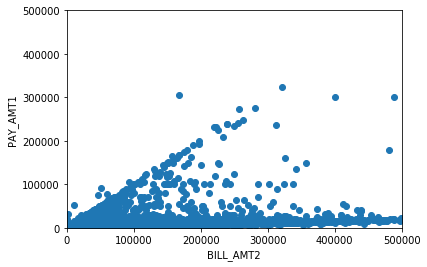

##### Pay_0 of -1: August bill vs amount paid in September

PAY_BINS,"(-0.001, 0.1]","(0.1, 100.0]","(100.0, 10000.0]","(10000.0, 873552.0]",All
BILL_BINS,,,,,
"(-69777.001, 0.0]",667,13,21,2,703
"(0.0, 100.0]",10,27,4,0,41
"(100.0, 10000.0]",307,27,3279,17,3630
"(10000.0, 100000.0]",38,4,306,864,1212
"(100000.0, 983931.0]",0,0,46,54,100
All,1022,71,3656,937,5686


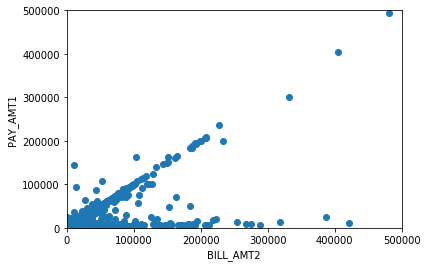

##### Pay_0 of -2: August bill vs amount paid in September

PAY_BINS,"(-0.001, 0.1]","(0.1, 100.0]","(100.0, 10000.0]","(10000.0, 873552.0]",All
BILL_BINS,,,,,
"(-69777.001, 0.0]",901,15,34,2,952
"(0.0, 100.0]",0,11,1,1,13
"(100.0, 10000.0]",6,1,1321,10,1338
"(10000.0, 100000.0]",4,1,52,350,407
"(100000.0, 983931.0]",1,0,23,25,49
All,912,28,1431,388,2759


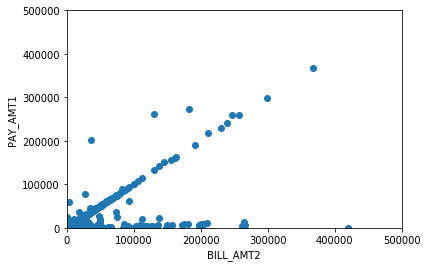

In [12]:
# First, lets create seperate dataframe to play with the data
df_test = df_raw_data.copy()

#let's create bins of how much is owed (bill_amount_bins) and how much is paid (pay_bins) - easier to cross-tab
#REMEMBER - BILL BIN IN AUGUST SHOULD CORRESPOND TO PAY AMMOUNT IN SEPTEBMER SO BILL AMT_2 and PAY_AMT1
bill_amount_bins = [df_test['BILL_AMT2'].min(), 0, 100, 10000, 100000,df_test['BILL_AMT2'].max()]
df_test['BILL_BINS'] = pd.cut(df_test.BILL_AMT2, bill_amount_bins, include_lowest=True).astype(str)

pay_bins = [df_test['PAY_AMT1'].min(), 0.1, 100, 10000, df_test['PAY_AMT1'].max()]
df_test['PAY_BINS'] = pd.cut(df_test.PAY_AMT1, pay_bins, include_lowest=True).astype(str)

#What does PAY_0 of 0, -1 and -2 mean?

## How much paid vs billed for those with PAY_0 = 0
display(Markdown("##### Pay_0 of 0: August bill vs amount paid in September"))
df_test_p0 = df_test[df_test.PAY_0 == 0]
display(pd.crosstab(df_test_p0.BILL_BINS, df_test_p0.PAY_BINS, margins=True))

fig, chart = plt.subplots()
chart.scatter(df_test_p0['BILL_AMT2'], df_test_p0['PAY_AMT1'])
chart.set_xlabel("BILL_AMT2")
chart.set_ylabel("PAY_AMT1")
plt.xlim([0.0, 500000])
plt.ylim([0.0, 500000])
plt.show()

## How much paid vs billed for those with PAY_0 =-1
display(Markdown("##### Pay_0 of -1: August bill vs amount paid in September"))
df_test_p0 = df_test[df_test.PAY_0 == -1]
display(pd.crosstab(df_test_p0.BILL_BINS, df_test_p0.PAY_BINS, margins=True))

fig, chart = plt.subplots()
chart.scatter(df_test_p0['BILL_AMT2'], df_test_p0['PAY_AMT1'])
chart.set_xlabel("BILL_AMT2")
chart.set_ylabel("PAY_AMT1")
plt.xlim([0.0, 500000])
plt.ylim([0.0, 500000])
plt.show()

## How much paid vs billed for those with PAY_0 =-2
display(Markdown("##### Pay_0 of -2: August bill vs amount paid in September"))
df_test_p0 = df_test[df_test.PAY_0 == -2]
display(pd.crosstab(df_test_p0.BILL_BINS, df_test_p0.PAY_BINS, margins=True))

fig, chart = plt.subplots()
chart.scatter(df_test_p0['BILL_AMT2'], df_test_p0['PAY_AMT1'])
chart.set_xlabel("BILL_AMT2")
chart.set_ylabel("PAY_AMT1")
plt.xlim([0.0, 500000])
plt.ylim([0.0, 500000])
plt.show()

___You should see___: 

* It appears 0 generally means paying OK, except for ~3 folks who have a balance but paid 0 - we should remove them for now, but on a real case these folks should be re-tagged (with client approval)
* It appears -1 generally means paying OK, but there are 355 (10 + 307 + 38) folks who paid nothing and had a bill - we should remove them for now, but on a real case these folks shoudl be re-tagged (with client approval)
* It appears -2 generally means paying OK, except for 11 people who paid 0, but had a balance - we should remove them for now, but on a real case these folks shoudl be re-tagged (with client approval) 

__Next Steps__:
* This data is clearly odd, let's click deeper
* Let's understand what PAY_0 means by comparing it vs Billed Ammount and rates of default


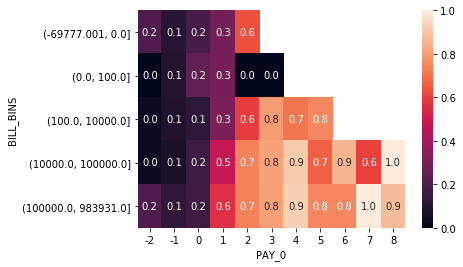

In [13]:
plot_df = df_test.pivot_table(
    index='BILL_BINS',
    columns='PAY_0',
    values='default.payment.next.month',
    aggfunc=np.mean)

sns.heatmap(plot_df, annot=True, fmt=".1f")


__What you should see__

* Heatmap of PAY_0 status vs how much was billed

* Some  really weird stuff going on - this data may be really dirty: 
 * 10-30% of people who make regular payments (-2,-1,0) and hold no balance (or have pre-paid) are in default - what is that all about?
 

* Also some interesing stuff that seems reasonable - e.g. folks with large balances have high likelihood of defaulting and especially if they delayed payments many times. Seems like log regression should be able to pick up on this



### Next steps
* Let's sum up how many people are affected by this no balance, or make payment and yet default?
* Hint - you should do a pandas crosstab and set margins=True and slce data only of folks who defaulted





In [22]:
#How many people does this affect
display(Markdown("PAY0 vs BILL_BINS on those that default"))
display(pd.crosstab(df_test[df_test['default.payment.next.month']==1].BILL_BINS,df_test[df_test['default.payment.next.month']==1].PAY_0,margins=True))


PAY0 vs BILL_BINS on those that default

PAY_0,-2,-1,0,1,2,3,4,5,6,7,8,All
BILL_BINS,,,,,,,,,,,,
"(-69777.001, 0.0]",200,75,53,345,40,0,0,0,0,0,0,713
"(0.0, 100.0]",0,4,2,3,0,0,0,0,0,0,0,9
"(100.0, 10000.0]",47,308,181,269,222,95,5,3,0,0,0,1130
"(10000.0, 100000.0]",14,82,1494,684,1261,139,51,12,6,3,11,3757
"(100000.0, 983931.0]",10,13,612,141,390,25,12,3,3,4,7,1220
All,271,482,2342,1442,1913,259,68,18,9,7,18,6829


___You should see___: 

Looks like about 713 people who have no balance or negative balance (e.g. pre-paid) are in default - makes zero sense. The most likely explanation is they closed their account and the system flag is same as default. Interesting...

We should drop these people as they are very much confusing signal with the noise. Warning on a real-case this would be the kind of thing you would need to check witht the client

__ Next steps __:
This leads to opposite question, is data on payment Pay_0 (since among most predictive variable) actually clean?

### 1.8.2 Statistics check - co-linearity

* We'd love to know how often are PAY_0 and PAY_1, PAY_1 and PAY_2 corelated
* probably best way to do this is with pairplot and using a custom function to create a heatmap since default (scatter) will be silly



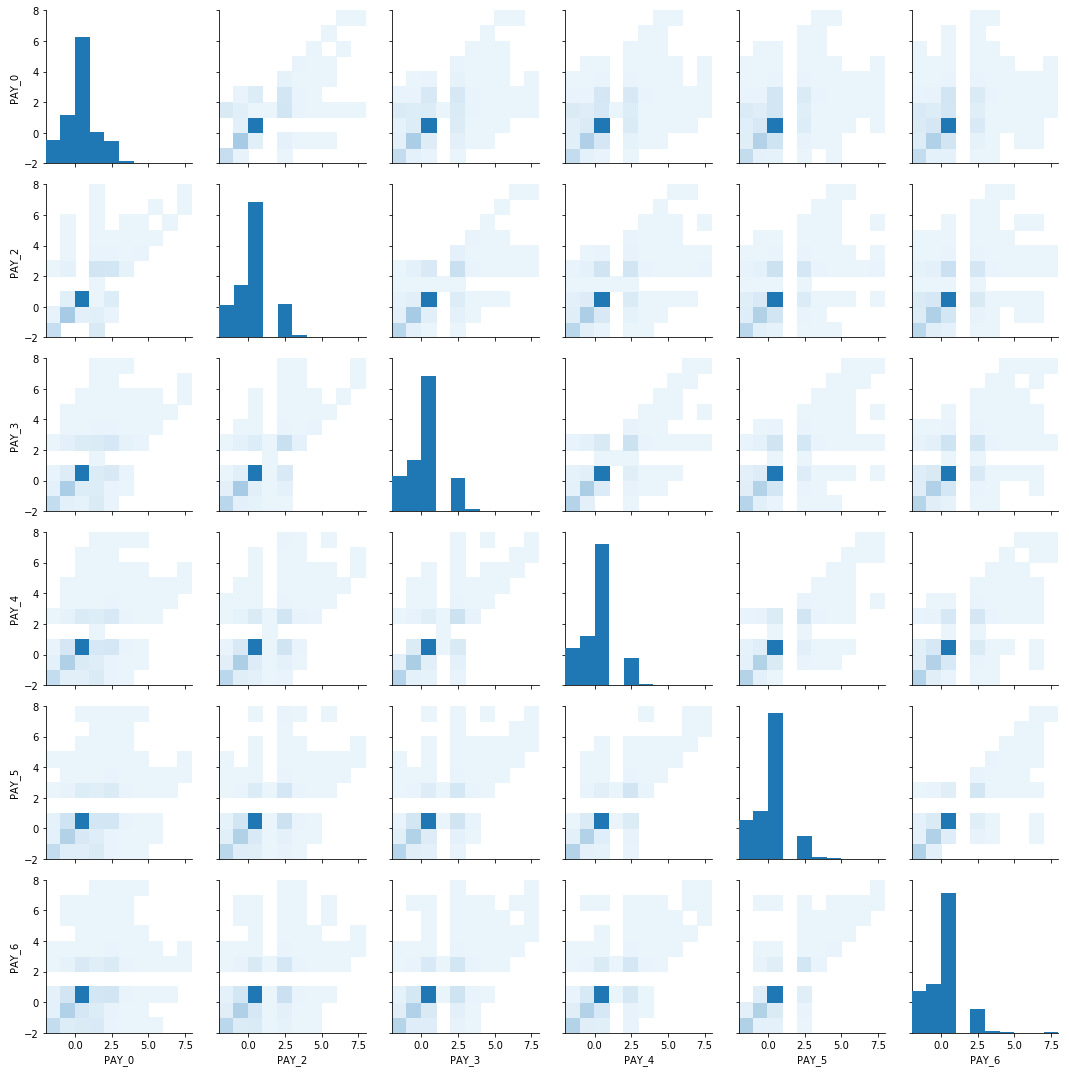

In [18]:
columns_to_plot = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5', 'PAY_6']
# sns.pairplot(df_test, vars = columns_to_plot)


def pairgrid_heatmap(x, y, **kws):
    cmap = sns.light_palette(kws.pop("color"), as_cmap=True)
    plt.hist2d(x, y, cmap=cmap, cmin=1, **kws)
    
chart = sns.PairGrid(df_test[columns_to_plot])
    
chart.map_diag(plt.hist, bins=10)
chart.map_offdiag(pairgrid_heatmap, bins=10)

___What you should see:___
    
* think these PAY_X are all correlated
* And also - apparently flag 1 is not used very much...

## 1.9. Data Clean-up + additional Feature Engineering

* Simple clean-up:
 * Drop 713 people who have no balance (or positive balance) and default?
 * Drop 369 folks who are categorized as paying, but paid 0 and have a balance - if we had time we'd clean data and set flags right here. This is a shrotcut you would not take in real life!!!
 
* Feature engineering:
 * Convert -2 and -1 bill amt to 0 (all in good standing)
  
__WARNING: The code to drop here is REALLY DANGEROUS!!!__
* At the very least to do this:
 * Client domain expert should approve this
 * You would need to document it in release notes.
 * you would need to make sure you re-do to this for all new data
 
* The right thing to do is:
 * Work with domain experts to understnad what these values mean and if wrong, what is the right value and also work on their back-end systems to make sure wrong values don't happen again 
 
Good news is we're doing it memory (vs in file) so you can go back this time around

### 1.9.1 First up - simple clean-up

* create new dataframe for clean data - call it df_clean, by copying all of df_raw_data

* Drop all bad records
 * Drop 713 people who have no balance (or positive balance) and default?
 * Drop 369 folks who are categorized as paying, but paid 0 and have a balance - if we had time we'd clean data and set flags right here. This is a shrotcut you would not take in real life!!!
 
* After each drop you should list number of records, as a ZD check
 
__Hint - the simplest way to do this is through pandas selection/slicing, by only slicing data you want and saving only that into df_clean__

### Drop 713+ who have no balance and default

'Records Before drop 30000'

'Records After drop 29287'

'Records delta 713'

### Drop 369 who did not make a payment and were mis-labeled as paying

'Records Before drop 29287'

'Records After drop 28918'

'Records delta 369'

### Ensure we dropped non-paying customers who are pretending to be paying

PAY_BINS,"(-0.001, 0.1]","(0.1, 100.0]","(100.0, 10000.0]","(10000.0, 873552.0]",All
BILL_BINS,,,,,
"(-1.0, 1.0]",183,0,6,1,190
"(-69777.0, -1.0]",27,2,9,1,39
"(1.0, 10000.0]",0,7,1494,6,1507
"(10000.0, 100000.0]",0,0,8752,523,9275
"(100000.0, 983931.0]",0,0,2613,1057,3670
All,210,9,12874,1588,14681


PAY_BINS,"(-0.001, 0.1]","(0.1, 100.0]","(100.0, 10000.0]","(10000.0, 873552.0]",All
BILL_BINS,,,,,
"(-1.0, 1.0]",463,1,7,1,472
"(-69777.0, -1.0]",133,9,13,1,156
"(1.0, 10000.0]",0,54,3283,17,3354
"(10000.0, 100000.0]",0,4,306,864,1174
"(100000.0, 983931.0]",0,0,46,54,100
All,596,68,3655,937,5256


PAY_BINS,"(-0.001, 0.1]","(0.1, 100.0]","(100.0, 10000.0]","(10000.0, 873552.0]",All
BILL_BINS,,,,,
"(-1.0, 1.0]",560,1,8,1,570
"(-69777.0, -1.0]",150,9,23,0,182
"(1.0, 10000.0]",0,12,1322,11,1345
"(10000.0, 100000.0]",0,1,52,350,403
"(100000.0, 983931.0]",0,0,23,25,48
All,710,23,1428,387,2548


### Ensure we dropped customers with negative balance that are treated as defaulting

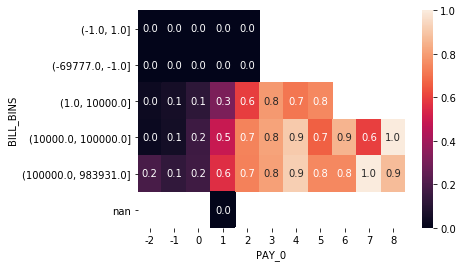

In [55]:
df_clean = df_raw_data.copy()

#drop 328 people who have no balance and yet defaulted (Remembre we need to do BILL_AMT2 because we care about August bill to set September flag)
display(Markdown("### Drop 713+ who have no balance and default"))
records_before = len(df_clean.index)
display("Records Before drop {}".format(records_before))
df_clean = df_clean[((df_clean.BILL_AMT2 <= 0) & (df_clean['default.payment.next.month'] <= 0)) | (df_clean.BILL_AMT2 > 0)]
records_after = len(df_clean.index)
display("Records After drop {}".format(records_after))
display("Records delta {}".format(records_before - records_after))


# drop 369 people who did not make a payment, had balance, but treated as duly paying
display(Markdown("### Drop 369 who did not make a payment and were mis-labeled as paying"))
records_before = len(df_clean.index)
display("Records Before drop {}".format(records_before))
df_clean = df_clean[(df_clean.PAY_0 > 0) | (df_clean.BILL_AMT2 <= 0) | ((df_clean.PAY_AMT1 > 0) & (df_clean.BILL_AMT2 > 0))]
records_after = len(df_clean.index)
display("Records After drop {}".format(records_after))
display("Records delta {}".format(records_before - records_after))



pay_bins = [df_clean['PAY_AMT1'].min(), 0.1, 100, 10000, df_clean['PAY_AMT1'].max()]
df_clean['PAY_BINS'] = pd.cut(df_test.PAY_AMT1, pay_bins, include_lowest=True).astype(str)
df_clean['BILL_BINS'] = pd.cut(df_clean.BILL_AMT2,[df_clean['BILL_AMT2'].min(),-1,1,10000,100000,df_clean['BILL_AMT2'].max()]).astype(str)

display(Markdown("### Ensure we dropped non-paying customers who are pretending to be paying"))


df_test_p0 = df_clean[df_clean.PAY_0 == 0]
display(pd.crosstab(df_test_p0.BILL_BINS, df_test_p0.PAY_BINS, margins=True))
df_test_p0 = df_clean[df_clean.PAY_0 == -1]
display(pd.crosstab(df_test_p0.BILL_BINS, df_test_p0.PAY_BINS, margins=True))
df_test_p0 = df_clean[df_clean.PAY_0 == -2]
display(pd.crosstab(df_test_p0.BILL_BINS, df_test_p0.PAY_BINS, margins=True))


display(Markdown("### Ensure we dropped customers with negative balance that are treated as defaulting"))

plot_df = df_clean.pivot_table(index='BILL_BINS', columns='PAY_0', values='default.payment.next.month', aggfunc=np.mean)
sns.heatmap(plot_df, annot=True, fmt=".1f")  




___What you should see___:

* We started with 30,000 records
* We ended up with 28918 records
* You should have a heat-map of PAY_0 vs BILL_BINS with default-rate as heat/color
 * In it you will se that nobody with balance below 1 is in default
* You should also see that nobody with PAY_0 of 0,-1 or -2 is in position of paying 0 while having a balance

### 1.9.2 Feature engineer the clean dataset

* Create a new function to transform PAY_0 of -1 and -2 into 0
* Since we only cleaned PAY_0 and not PAY_2, etc and those seem very correlated, let's not inlcude PAY_2 and above
* Re-use dataframe mapper we used earlier
* Save output to numpy_clean_fe and df_clean_fe

In [57]:
def transform_PAY(x):
    x = np.apply_along_axis(lambda y: 0 if y < 0 else y, 1, x)
    return x

pipeline_mapper = DataFrameMapper([
    (['LIMIT_BAL'], preprocessing.StandardScaler()),
    (['SEX'], preprocessing.LabelBinarizer()),
    (['EDUCATION'], preprocessing.LabelBinarizer()),
    (['MARRIAGE'], preprocessing.LabelBinarizer()),
    (['AGE'], preprocessing.StandardScaler()),
    (['PAY_0'], preprocessing.FunctionTransformer(transform_PAY)),  
    (['BILL_AMT1'], preprocessing.StandardScaler()),
    (['BILL_AMT2'], preprocessing.StandardScaler()),
    (['BILL_AMT3'], preprocessing.StandardScaler()),
    (['BILL_AMT4'], preprocessing.StandardScaler()),
    (['BILL_AMT5'], preprocessing.StandardScaler()),
    (['BILL_AMT6'], preprocessing.StandardScaler()),
    (['PAY_AMT1'], preprocessing.StandardScaler()),
    (['PAY_AMT2'], preprocessing.StandardScaler()),
    (['PAY_AMT3'], preprocessing.StandardScaler()),
    (['PAY_AMT4'], preprocessing.StandardScaler()),
    (['PAY_AMT5'], preprocessing.StandardScaler()),
    (['PAY_AMT6'], preprocessing.StandardScaler()),
])

# transform columns from df_raw_Ddata into numpy_fe array according to our pipeline recipe above
numpy_clean_fe = pipeline_mapper.fit_transform(df_clean)


# get list of features from our feature engineered data-frame
FEATURES = pipeline_mapper.transformed_names_

#OPTIONAL - create new dataframe with transformed variables (in case we want to use it to examine data)
# df_clean_fe = pd.DataFrame(data=numpy_clean_fe, columns=FEATURES)
# display(df_clean_fe.head(10))

display(numpy_clean_fe.shape)
display(numpy_clean_fe[0:5])




C:\ML\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ML\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\ML\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ML\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


(28918, 27)

array([[-1.12966763,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        , -1.24379813,  2.        ,
        -0.65870187, -0.66588395, -0.68455647, -0.68891669, -0.67844499,
        -0.66735499, -0.3489062 , -0.23001857, -0.30123344, -0.31556534,
        -0.31951264, -0.29687129],
       [-0.5901141 ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        , -0.15566432,  0.        ,
        -0.31767739, -0.51386065, -0.50085314, -0.46835929, -0.43509939,
        -0.40892057, -0.25872568, -0.19519135, -0.24489988, -0.25140842,
        -0.25402512, -0.0188268 ],
       [-0.8984304 ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.1707

## 1.10 Re-Run Logistic Regression

* Split newly cleaned data & train new logistic regression model
* Examine performance:
 * Accuracy
 * AuROC
 * Confusion  matrix
* Examine coefficients

### 1.10.1 Split  data and train logistic regression

* Determine which features you want to use 
* Determine TARGET
* Split df_clean_fe  into X_train, X_test, y_train, y_test
* Create a new logistic regression object
* Train (fit) Logistic Regression model with X_train and  y_train

In [58]:
#create numpy target 
numpy_target = df_clean[TARGET].values

#Original distribution
display("Orginal distribution")
display(pd.Categorical(df_clean[TARGET]).describe())

# The function train_test_split, splits the arguments into two sets.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(numpy_clean_fe, numpy_target, test_size=0.2, random_state=2, stratify=numpy_target)

linear_model = sklearn.linear_model.LogisticRegression(random_state=42)
linear_model.fit(X_train, y_train)

'Orginal distribution'

,counts,freqs
categories,,
0,22947,0.79352
1,5971,0.20648


C:\ML\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

__What you should see:__
* not  much really
* just the logistic regression object that was created with all the paramaters

### 1.10.2 Examine performance

* Predict results into y_hat_test
* Calculate and display test accuracy 
* Calculate and display AuROC
* Display confusion matrix


In [59]:
# Run Logistic Regression Training
linear_model = sklearn.linear_model.LogisticRegression(random_state=42)
linear_model.fit(X_train, y_train)

display(Markdown('###### Performance on test set'))
#create prediciton
y_hat_test = linear_model.predict(X_test)
y_hat_test_proba = linear_model.predict_proba(X_test)

# Accuracy
lr_accuracy = sklearn.metrics.accuracy_score(y_test, y_hat_test)
display('Linear model test set accuracy: {:.4f}'.format(lr_accuracy))
display(Markdown('Linear model predicion distribution:'))
display(pd.Categorical(y_hat_test).describe())

# AuRoc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test_proba[:,1])
AuROC = sklearn.metrics.auc(false_positive_rate, true_positive_rate)
display(Markdown('\n\nauROC is: {:.2f}'.format(AuROC * 100)))

# Confusion matrix
display(pd.DataFrame(confusion_matrix(y_test, y_hat_test), 
             columns=['Predicted Not Default', 'Predicted to Default'],
             index=['Actual Not Default', 'Actual Default']))

C:\ML\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###### Performance on test set

'Linear model test set accuracy: 0.8453'

Linear model predicion distribution:

,counts,freqs
categories,,
0,5099,0.88157
1,685,0.11843




auROC is: 84.14

,Predicted Not Default,Predicted to Default
Actual Not Default,4397,193
Actual Default,702,492


__What  you should see:__

* Modest accuracy improvement of 85% (vs 83% before)
* Modest auROC improvement from 82 to 84

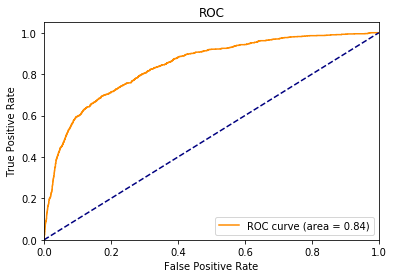

In [60]:
#ROC chart
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', label='ROC curve (area = %0.2f)' % AuROC)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### 1.10.3 Examine coefficients

* Get coefficients from logistic regression object (attribute coef_)
* pair them with features (maybe as a dictionary) and sort  by value (smallest to biggest)

In [61]:
#get coefficients (same order as features fed into Logistic Regression)
coefficients = linear_model.coef_

#put it in a nice dataframe and sort from most impact to least, sicne raw print-out is ugly
display(pd.DataFrame({'features': FEATURES, 'coefficients': coefficients[0]}).sort_values('coefficients'))

,features,coefficients
9,MARRIAGE_0,-1.075064
0,LIMIT_BAL,-1.037680
16,BILL_AMT2,-0.734147
7,EDUCATION_5,-0.661479
2,EDUCATION_0,-0.554243
6,EDUCATION_4,-0.490308
11,MARRIAGE_2,-0.410319
10,MARRIAGE_1,-0.371343
22,PAY_AMT2,-0.348770
19,BILL_AMT5,-0.160651


___What you should see___:
* Feature importance interpretation:
 * Top 3 indicators of non-default:
  * LIMIT_BAL - Size of your balance limit is now negatively correlated - this tells us bank is good at giving bigger balance to safer people
  * BILL_AMT2 - size of  your bill 2 months ago - this is weird and likely some kind of colinearity between it AND   BILL_AMT1
  * MARRIAGE_0	- being married strongly suggest default - very, very odd...but we saw in data it's a real, alebeit weak signal
 * Top 3 indicators of default:
  * BILL_AMT1 - size of your last bill
  * PAY_0 - payment status (i.e. on time vs late and how late)
  * AGE - being older makes you likely to default more. This is real, but think overfitting since going from 20s to 30s make you less of a risk and then it becomes a bigger risk as you're over 50 - a non-linear algorithm (e.g. tree-based) would pick up on this, or you could feature engineer bins and feed as one hot

# Sprint 2

__Plan:__
1. Let's try training with a non-linear model such as XGBoost
2. Let's explore potential features to engineer
3. Let's engineer features with a strong signal and create new training set
4. Let's re-run XGboost with new features




## 2.1 Let's try running XGBoost and see what happens

__Steps:__

* Create  new XGBClassifer object
* Train it with same training data from last logistic regression model
* Run prediction on test data and see performance:
 * Accuracy
 * AuROC
 * confusion matrix

In [62]:
#Create XGBoost classifer
XG_model = XGBClassifier()
#Train new model
XG_model.fit(X_train, y_train)

y_hat_test = XG_model.predict(X_test)
y_hat_test_proba = XG_model.predict_proba(X_test)

# Accuracy
xg_accuracy = sklearn.metrics.accuracy_score(y_test, y_hat_test)
display('XGBoost model test set accuracy: {:.4f}'.format(xg_accuracy))
display(Markdown('XGBoost model predicion distribution:'))
display(pd.Categorical(y_hat_test).describe())

# AuRoc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test_proba[:,1])
AuROC = sklearn.metrics.auc(false_positive_rate, true_positive_rate)
display(Markdown('\n\nauROC is: {:.2f}'.format(AuROC * 100)))

# Confusion matrix
display(pd.DataFrame(confusion_matrix(y_test, y_hat_test), 
             columns=['Predicted Not Default', 'Predicted to Default'],
             index=['Actual Not Default', 'Actual Default']))

'XGBoost model test set accuracy: 0.8589'

XGBoost model predicion distribution:

,counts,freqs
categories,,
0,4888,0.84509
1,896,0.15491




auROC is: 87.89

,Predicted Not Default,Predicted to Default
Actual Not Default,4331,259
Actual Default,557,637


___What yuou should see___:
* Accuracy improved a little bit over Log Regression - from 85% to 86%
* AuRock improved quite a bit too - from 85 to 88
* We are predicting defaults closer to the  true frequency in the population

___Next up:___ Let's see what features it's reacting to most

In [63]:
pd.DataFrame({'features': FEATURES, 'importance': XG_model.feature_importances_}).sort_values('importance', ascending=False)

,features,importance
15,BILL_AMT1,0.221465
16,BILL_AMT2,0.153322
0,LIMIT_BAL,0.109029
22,PAY_AMT2,0.080068
21,PAY_AMT1,0.078365
14,PAY_0,0.073254
13,AGE,0.061329
24,PAY_AMT4,0.044293
23,PAY_AMT3,0.037479
25,PAY_AMT5,0.032368


__What you should see__:
* Looks like alsmot all features are used (except most education levels and marriage value of 1, 0)
* Looks like size of last two bills is pretty important, as is size of credit (Similar to log-regression)
* Also, looks like how much was owed and paid for last 2 months is an important  signal too

## 2.2 Let's explore potential features

* Two potential hypothesis
 * Share of  credit used
 * Sudden spike in spend
* Approach:
 * Manually create a feature
 * Explore if feature  has signal through charts, cross-tabs, etc.

### 2.2.1 Feature Engineering - Share  of credit used

* Let's define debt load as percent - how much is owed vs size of credit available and call that column "Balance_ratio"
* Let's create a function to calculate it
* Then let's see if there is a signal in that flag (e.g. histogram)

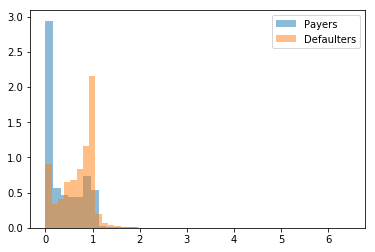

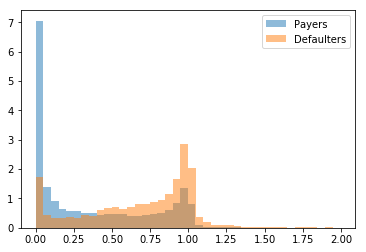

In [64]:
def flag_high_balance(row):
    #  we don't wwant to be  dividing by 0 :) 
    if row['BILL_AMT1'] > 0 and row['LIMIT_BAL'] > 0:
        return (row['BILL_AMT1'] / row['LIMIT_BAL'])
    else:
        return 0

#apply  custom function to create a new field Balance_ratio 
df_clean['Balance_ratio'] = df_clean.apply(flag_high_balance, axis=1)

#create histogram  of payers vs defaulters and what Balance ratio 
plt.hist(df_clean[(df_clean['default.payment.next.month'] == 0)]['Balance_ratio'].dropna(), bins=40, alpha=0.5, label='Payers', density = True)
plt.hist(df_clean[(df_clean['default.payment.next.month'] == 1)]['Balance_ratio'].dropna(), bins=40, alpha=0.5, label='Defaulters', density = True)
plt.legend(loc='upper right')
plt.show()

#create histogram  of payers vs defaulters: Look only at balance ration <2 to remoe effects of long-tail
plt.hist(df_clean[(df_clean['default.payment.next.month'] == 0) & (df_clean['Balance_ratio']<2) ]['Balance_ratio'].dropna(), bins=40, alpha=0.5, label='Payers', density = True)
plt.hist(df_clean[(df_clean['default.payment.next.month'] == 1) & (df_clean['Balance_ratio']<2) ]['Balance_ratio'].dropna(), bins=40, alpha=0.5, label='Defaulters', density = True)
plt.legend(loc='upper right')
plt.show()


___What you should see:___

* Histogram of Payers vs defaulters distribution
* You should see that defaulters:
 * Much larger share is skewed to the right (higher debt load) vs payers
 * Above 1.25, it's all defaulters

___This is definitely a signal and we should use it___


### 2.2.2 Next up - let's look at  folks who are suddenly spending a lot more than usual

* Let's define spending spike is last month's bill vs average from previous five 
* Let's create a function to calculate how much of a spike we have
* Then let's see if there is a signal in that variable

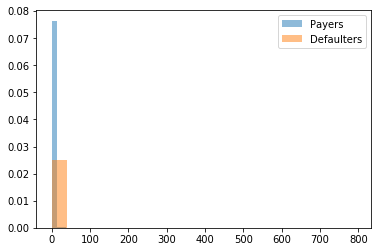

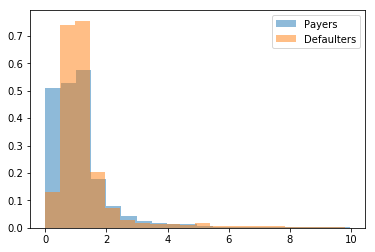

In [65]:
def flag_spend_spike(row):
    if row['BILL_AMT1'] > 0 and row['BILL_AMT2'] >= 0 and (
        row['BILL_AMT3'] >= 0 and row['BILL_AMT4'] >= 0 and (
            row['BILL_AMT5'] >= 0 and row['BILL_AMT6'] >= 0)):
        
        five_month_sum = row['BILL_AMT2'] + row['BILL_AMT3'] + \
            row['BILL_AMT4'] + row['BILL_AMT5'] + row['BILL_AMT6']
       
        if (five_month_sum > 0):
            return row['BILL_AMT1'] / (five_month_sum / 5)
        else:
            return 0
    else:
        return 0

#Create new variable
df_clean['SpendSpike_Ratio'] = df_clean.apply(flag_spend_spike, axis=1)

#Histogram
plt.hist(df_clean[(df_clean['default.payment.next.month'] == 0)]['SpendSpike_Ratio'].dropna(), bins=20, alpha=0.5, label='Payers', density = True)
plt.hist(df_clean[(df_clean['default.payment.next.month'] == 1)]['SpendSpike_Ratio'].dropna(), bins=20, alpha=0.5, label='Defaulters', density = True)
plt.legend(loc='upper right')
plt.show()

#Histoggram, but without the long tail
plt.hist(df_clean[(df_clean['default.payment.next.month'] == 0) & (df_clean['SpendSpike_Ratio'] < 10)]['SpendSpike_Ratio'].dropna(), bins=20, alpha=0.5, label='Payers', density = True)
plt.hist(df_clean[(df_clean['default.payment.next.month'] == 1) & (df_clean['SpendSpike_Ratio'] < 10)]['SpendSpike_Ratio'].dropna(), bins=20, alpha=0.5, label='Defaulters', density = True)
plt.legend(loc='upper right')
plt.show()

__What you should see:__
* Histogram of  payers vs defaulters
 * Histogram has outliers, so probably good idea to limit to 0 to 10x ratio
* Looking at histogram, it doesn't seem like a very strong signal
 * It becomes stronger at extremes (e.g. 5x more spending than usual)

## 2.3 Adding  new features into training data-set   

* Bring back DataFrameMapper
 * Add in two new features
 * Toth will need to be normalized with StandardScaler

* Transforme df_clean into numpy_clean_biz_fe and optionally into dataframe df_clean_biz_fe
* Display first  10 rows

In [66]:
pipeline_mapper = DataFrameMapper([
    (['LIMIT_BAL'], preprocessing.StandardScaler()),
    (['SEX'], preprocessing.LabelBinarizer()),
    (['EDUCATION'], preprocessing.LabelBinarizer()),
    (['MARRIAGE'], preprocessing.LabelBinarizer()),
    (['AGE'], preprocessing.StandardScaler()),
    (['PAY_0'], preprocessing.FunctionTransformer(transform_PAY)),  
    (['BILL_AMT1'], preprocessing.StandardScaler()),
    (['BILL_AMT2'], preprocessing.StandardScaler()),
    (['BILL_AMT3'], preprocessing.StandardScaler()),
    (['BILL_AMT4'], preprocessing.StandardScaler()),
    (['BILL_AMT5'], preprocessing.StandardScaler()),
    (['BILL_AMT6'], preprocessing.StandardScaler()),
    (['PAY_AMT1'], preprocessing.StandardScaler()),
    (['PAY_AMT2'], preprocessing.StandardScaler()),
    (['PAY_AMT3'], preprocessing.StandardScaler()),
    (['PAY_AMT4'], preprocessing.StandardScaler()),
    (['PAY_AMT5'], preprocessing.StandardScaler()),
    (['PAY_AMT6'], preprocessing.StandardScaler()),
    (['Balance_ratio'], preprocessing.StandardScaler()),
    (['SpendSpike_Ratio'], preprocessing.StandardScaler()),
])

# transform columns from df_raw_Ddata into numpy_fe array according to our pipeline recipe above
numpy_clean_biz_fe = pipeline_mapper.fit_transform(df_clean)

FEATURES = pipeline_mapper.transformed_names_

#OPTIONAL - create new dataframe with transformed variables (in case we want to use it to examine data)
# df_clean_biz_fe = pd.DataFrame(data=numpy_clean_biz_fe, columns=FEATURES)
# display(df_clean_biz_fe.head(10))

display(numpy_clean_biz_fe.shape)
display(numpy_clean_biz_fe[0:5])



C:\ML\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ML\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\ML\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ML\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


(28918, 29)

array([[-1.12966763,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        , -1.24379813,  2.        ,
        -0.65870187, -0.66588395, -0.68455647, -0.68891669, -0.67844499,
        -0.66735499, -0.3489062 , -0.23001857, -0.30123344, -0.31556534,
        -0.31951264, -0.29687129, -0.58578094,  0.41130943],
       [-0.5901141 ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        , -0.15566432,  0.        ,
        -0.31767739, -0.51386065, -0.50085314, -0.46835929, -0.43509939,
        -0.40892057, -0.25872568, -0.19519135, -0.24489988, -0.25140842,
        -0.25402512, -0.0188268 , -0.27139034,  0.04875445],
       [-0.8984304 ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
  

__What you should see:__
* Same 10 rows we had last time, but we two new variables so number of columns is 29 (vs 27 before)

## 2.4 Re-run XGBoost

* Split  new data between train and test into: X_train, X_test, y_train, y_test
* re-train XG_model
* See performance:
 * Accuracy
 * AuROC
 * Confusion matrix
 

In [67]:
numpy_target = df_clean[TARGET].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(numpy_clean_biz_fe, numpy_target, test_size=0.2, random_state=2, stratify=numpy_target)

XG_model = XGBClassifier(seed=42)
XG_model.fit(X_train, y_train)

y_hat_test = XG_model.predict(X_test)
y_hat_test_proba = XG_model.predict_proba(X_test)

# Accuracy
xg_accuracy = sklearn.metrics.accuracy_score(y_test, y_hat_test)
display('XGBoost model test set accuracy: {:.4f}'.format(xg_accuracy))
display(Markdown('XGBoost model predicion distribution:'))
display(pd.Categorical(y_hat_test).describe())

# AuRoc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test_proba[:,1])
AuROC = sklearn.metrics.auc(false_positive_rate, true_positive_rate)
display(Markdown('\n\nauROC is: {:.2f}'.format(AuROC * 100)))

# Confusion matrix
display(pd.DataFrame(confusion_matrix(y_test, y_hat_test), 
             columns=['Predicted Not Default', 'Predicted to Default'],
             index=['Actual Not Default', 'Actual Default']))

'XGBoost model test set accuracy: 0.8651'

XGBoost model predicion distribution:

,counts,freqs
categories,,
0,4848,0.838174
1,936,0.161826




auROC is: 88.56

,Predicted Not Default,Predicted to Default
Actual Not Default,4329,261
Actual Default,519,675


___What you should see:___

* Accuracy is slightly better at 87 (vs 86)
* AuC has slighlty improved to 89 (from 88)

* At this point, think safe to say we're hitting diminishing returns...

# Sprint 3 - ZD and prepare for handoff

1. Run Feature importance
2. Build cost function savings
3. Tune the model for best economic performance
4. Prepare for hand-off

## 3.1. Feature importance

* Run feature importance within XGBoost
 * hint saves in feature_importances_ attribute
* Display in decreasing  order of importance

In [68]:
display(
    pd.DataFrame({
        'features': FEATURES,
        'importance': XG_model.feature_importances_
    }).sort_values('importance', ascending=False))

,features,importance
27,Balance_ratio,0.149007
28,SpendSpike_Ratio,0.132450
16,BILL_AMT2,0.120861
14,PAY_0,0.087748
22,PAY_AMT2,0.082781
13,AGE,0.067881
21,PAY_AMT1,0.062914
15,BILL_AMT1,0.041391
24,PAY_AMT4,0.039735
23,PAY_AMT3,0.036424


__What you should see__:

You should see in descending order what variables have most predictive power (e.g. Balance ratio, size of balance, whether paying regularly, how much did last increase spike)

* A few cool things to notice:
* Our engineered features have risen to the top (e.g. balance ratio and spendspike raito)
* Interestingly enough, although spend-spike did not look promisng, it must be that XGBoost found it to be helpful with some other variables

__IMPORTANT: XGBoost  just tells us how often variables are used to reach a prediciton, but no in what direction does that coefficient run. This is an example of a complex model also having less explainability__

## 3.2 Let's build a cost model

* Understand total cost of these defaults today (on test data) and what would it be with current model 
 * Those who don't default will eventually pay 98%
 * In a default, on average you recover 10% of balance
 * If you can spot it early, on average you recover 40% (many will still default, but most will actually pay back reduced ammount) 
 * If you predict it wrong, you get 40% whereas you would have gotten 98% otherwise

* Calcualte what is their return on the portfolio today in 3 scenarios:
 * With no intervention - i.e. as is today - baseline
 * With our intervention - us
 * With perfect knowledge - the bear
 
*  Also, calculate  value of false positives (since they really cost us a lot)

___Hint - you could just iterate over every single entry, calcualte net return for all 3 scenarios and save each one in a seperate variable___
 


In [69]:
y_hat = XG_model.predict(numpy_clean_biz_fe)
xg_accuracy = sklearn.metrics.accuracy_score(numpy_target, y_hat)
display(Markdown('XGBoost model test set accuracy: {:.4f}'.format(xg_accuracy)))

EXPECTED_REPAY = 0.98
DEFAULT_RECOUP = 0.10
PRE_DEFAULT_RC = 0.40

XGBoost model test set accuracy: 0.8698

In [70]:
# smaller dataframe for cost model calcs
final_df = pd.DataFrame()

# we  have to use  df_clean, not df_clean_biz_fe  b/c value of loans  has been normalized
final_df['BILL_AMT1'] = df_clean['BILL_AMT1']
final_df['Default'] = df_clean[TARGET]
final_df['yhat'] = y_hat


final_df['loans_Baseline'] = (final_df['BILL_AMT1'] * EXPECTED_REPAY) * (
    1-final_df['Default']) + (final_df['BILL_AMT1'] * DEFAULT_RECOUP) * final_df['Default']

final_df['loans_PerfectModel'] = (final_df['BILL_AMT1'] * EXPECTED_REPAY) * (
    1-final_df['Default']) + (final_df['BILL_AMT1'] * PRE_DEFAULT_RC) * final_df['Default']

final_df['loans_withModel'] = (final_df['BILL_AMT1']*PRE_DEFAULT_RC) * \
    final_df['yhat'] + (1 - final_df['yhat']) * final_df['loans_Baseline']

final_df['bad_predictions'] = (final_df['BILL_AMT1'] * (
    EXPECTED_REPAY-PRE_DEFAULT_RC)) * (1-final_df['Default']) * final_df['yhat']

print('Baseline value of loans:\t\t {0:,.0f}'.format(
    final_df['loans_Baseline'].sum()))
print('Perfect knoweldge value of loans:\t {0:,.0f}'.format(
    final_df['loans_PerfectModel'].sum()))
print('ML Model value of loans:\t\t {0:,.0f}'.format(
    final_df['loans_withModel'].sum()))
print('Cost of false positives:\t\t {0:,.0f}'.format(
    final_df['bad_predictions'].sum()))
print('\n\n')
print('% gain {:.02%}'.format(
    (final_df['loans_withModel'].sum()/final_df['loans_Baseline'].sum())-1))
print('% gained of possible gain {:.02%}'.format((final_df['loans_withModel'].sum(
) - final_df['loans_Baseline'].sum())/(final_df['loans_PerfectModel'].sum()-final_df['loans_Baseline'].sum())))
print('\n\n')
print('% additional gain possible without false positives {:.02%}'.format(
    final_df['bad_predictions'].sum()/final_df['loans_Baseline'].sum()))

Baseline value of loans:		 1,120,491,509
Perfect knoweldge value of loans:	 1,248,920,150
ML Model value of loans:		 1,151,663,130
Cost of false positives:		 45,026,997



% gain 2.78%
% gained of possible gain 24.27%



% additional gain possible without false positives 4.02%


___What you should see___:

* Model gets additional ~3% lift in extra "revenue"
* However, it only captured ~24% of what was possible with perfect information
* If we didn't make false positives (assumed someobody will default, when they did not), we could have increased revenue by additional 4%

### Next step: Let's see if we can reduce number of false posives
* How many false positives have probability just barely over 50%
* If we increased probability required, what would be economic impact?

## 3.3 Tune the model

* Let't see if accuracy improves when model is more confident
* Tune algorithm to predict at the threshold where maximum revenue is reached

### 3.3.1 Examine if  higher model probability  leads to better outcomes

* Get probabilities for each prediction - hint XG_model has predict_proba() function you can use 
* Bin probabilities into 10 bins (0-100)
* For each bin show what is actual rate of default - you can just use cross-tab

In [71]:
y_probabilities = XG_model.predict_proba(numpy_clean_biz_fe)[:,1]

final_df['yhat_prob'] = y_probabilities

final_df['PROBABILITY_BINS'] = pd.cut(final_df.yhat_prob,[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]).astype(str)

pd.crosstab(final_df['PROBABILITY_BINS'], final_df['Default'],normalize='index',margins=True )

Default,0,1
PROBABILITY_BINS,,
"(0.0, 0.1]",0.978023,0.021977
"(0.1, 0.2]",0.855509,0.144491
"(0.2, 0.3]",0.732650,0.267350
"(0.3, 0.4]",0.588832,0.411168
"(0.4, 0.5]",0.558621,0.441379
"(0.5, 0.6]",0.447853,0.552147
"(0.6, 0.7]",0.315714,0.684286
"(0.7, 0.8]",0.228419,0.771581
"(0.8, 0.9]",0.144366,0.855634


___What you should see___:

* Cross tab of probability of default bins with  actual probabolity
* Looks like increased probability does have many fewer false positive

### Next steps

* Let's test different cut-offs of probability and see what happens to the total value created

### 3.3.2 Tune model to optimize for revenue gain

* Run through every probability threshold from 0.5 to 1 in 0.01 increments
* For each cut-off, calcualte total value of loans with ML model prediciton
* Model benefit  what model predicts is optimal cut-off where  cost of false positives is outweighted by benefit of true positives

___Warning - this a a lot of loops - will take a minute  or two to compute___


'At probability threshold of 0.00, revenue gain is -45.46%'

'At probability threshold of 0.01, revenue gain is -44.50%'

'At probability threshold of 0.02, revenue gain is -42.36%'

'At probability threshold of 0.03, revenue gain is -39.87%'

'At probability threshold of 0.04, revenue gain is -37.45%'

'At probability threshold of 0.05, revenue gain is -35.73%'

'At probability threshold of 0.06, revenue gain is -34.51%'

'At probability threshold of 0.07, revenue gain is -33.22%'

'At probability threshold of 0.08, revenue gain is -31.67%'

'At probability threshold of 0.09, revenue gain is -30.01%'

'At probability threshold of 0.10, revenue gain is -28.44%'

'At probability threshold of 0.11, revenue gain is -26.40%'

'At probability threshold of 0.12, revenue gain is -23.63%'

'At probability threshold of 0.13, revenue gain is -20.97%'

'At probability threshold of 0.14, revenue gain is -18.55%'

'At probability threshold of 0.15, revenue gain is -15.14%'

'At probability threshold of 0.16, revenue gain is -12.01%'

'At probability threshold of 0.17, revenue gain is -9.46%'

'At probability threshold of 0.18, revenue gain is -7.31%'

'At probability threshold of 0.19, revenue gain is -5.71%'

'At probability threshold of 0.20, revenue gain is -4.51%'

'At probability threshold of 0.21, revenue gain is -3.51%'

'At probability threshold of 0.22, revenue gain is -2.56%'

'At probability threshold of 0.23, revenue gain is -1.78%'

'At probability threshold of 0.24, revenue gain is -1.11%'

'At probability threshold of 0.25, revenue gain is -0.56%'

'At probability threshold of 0.26, revenue gain is -0.01%'

'At probability threshold of 0.27, revenue gain is 0.53%'

'At probability threshold of 0.28, revenue gain is 0.79%'

'At probability threshold of 0.29, revenue gain is 1.14%'

'At probability threshold of 0.30, revenue gain is 1.34%'

'At probability threshold of 0.31, revenue gain is 1.59%'

'At probability threshold of 0.32, revenue gain is 1.72%'

'At probability threshold of 0.33, revenue gain is 1.84%'

'At probability threshold of 0.34, revenue gain is 1.86%'

'At probability threshold of 0.35, revenue gain is 1.95%'

'At probability threshold of 0.36, revenue gain is 2.05%'

'At probability threshold of 0.37, revenue gain is 2.08%'

'At probability threshold of 0.38, revenue gain is 2.12%'

'At probability threshold of 0.39, revenue gain is 2.15%'

'At probability threshold of 0.40, revenue gain is 2.19%'

'At probability threshold of 0.41, revenue gain is 2.23%'

'At probability threshold of 0.42, revenue gain is 2.28%'

'At probability threshold of 0.43, revenue gain is 2.35%'

'At probability threshold of 0.44, revenue gain is 2.36%'

'At probability threshold of 0.45, revenue gain is 2.40%'

'At probability threshold of 0.46, revenue gain is 2.48%'

'At probability threshold of 0.47, revenue gain is 2.54%'

'At probability threshold of 0.48, revenue gain is 2.60%'

'At probability threshold of 0.49, revenue gain is 2.71%'

'At probability threshold of 0.50, revenue gain is 2.78%'

'At probability threshold of 0.51, revenue gain is 2.82%'

'At probability threshold of 0.52, revenue gain is 2.82%'

'At probability threshold of 0.53, revenue gain is 2.88%'

'At probability threshold of 0.54, revenue gain is 2.95%'

'At probability threshold of 0.55, revenue gain is 2.95%'

'At probability threshold of 0.56, revenue gain is 2.99%'

'At probability threshold of 0.57, revenue gain is 3.07%'

'At probability threshold of 0.58, revenue gain is 3.04%'

'At probability threshold of 0.59, revenue gain is 3.04%'

'At probability threshold of 0.60, revenue gain is 3.02%'

'At probability threshold of 0.61, revenue gain is 3.04%'

'At probability threshold of 0.62, revenue gain is 3.04%'

'At probability threshold of 0.63, revenue gain is 3.03%'

'At probability threshold of 0.64, revenue gain is 2.96%'

'At probability threshold of 0.65, revenue gain is 2.87%'

'At probability threshold of 0.66, revenue gain is 2.81%'

'At probability threshold of 0.67, revenue gain is 2.75%'

'At probability threshold of 0.68, revenue gain is 2.74%'

'At probability threshold of 0.69, revenue gain is 2.70%'

'At probability threshold of 0.70, revenue gain is 2.64%'

'At probability threshold of 0.71, revenue gain is 2.57%'

'At probability threshold of 0.72, revenue gain is 2.47%'

'At probability threshold of 0.73, revenue gain is 2.41%'

'At probability threshold of 0.74, revenue gain is 2.30%'

'At probability threshold of 0.75, revenue gain is 2.16%'

'At probability threshold of 0.76, revenue gain is 2.04%'

'At probability threshold of 0.77, revenue gain is 1.94%'

'At probability threshold of 0.78, revenue gain is 1.84%'

'At probability threshold of 0.79, revenue gain is 1.74%'

'At probability threshold of 0.80, revenue gain is 1.66%'

'At probability threshold of 0.81, revenue gain is 1.59%'

'At probability threshold of 0.82, revenue gain is 1.47%'

'At probability threshold of 0.83, revenue gain is 1.40%'

'At probability threshold of 0.84, revenue gain is 1.34%'

'At probability threshold of 0.85, revenue gain is 1.24%'

'At probability threshold of 0.86, revenue gain is 1.16%'

'At probability threshold of 0.87, revenue gain is 1.09%'

'At probability threshold of 0.88, revenue gain is 1.02%'

'At probability threshold of 0.89, revenue gain is 0.89%'

'At probability threshold of 0.90, revenue gain is 0.81%'

'At probability threshold of 0.91, revenue gain is 0.73%'

'At probability threshold of 0.92, revenue gain is 0.65%'

'At probability threshold of 0.93, revenue gain is 0.52%'

'At probability threshold of 0.94, revenue gain is 0.41%'

'At probability threshold of 0.95, revenue gain is 0.29%'

'At probability threshold of 0.96, revenue gain is 0.19%'

'At probability threshold of 0.97, revenue gain is 0.09%'

'At probability threshold of 0.98, revenue gain is 0.02%'

'At probability threshold of 0.99, revenue gain is 0.02%'

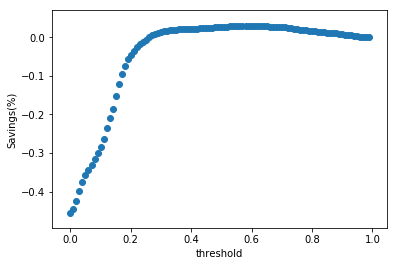

Max savings is at 57.000000% of 3.071741%


In [72]:
rev_gain = []

for threshold in np.arange(0.00, 1.0, 0.01):

    final_df['yhat'] =  final_df['yhat_prob'].apply(lambda x: 1 if x > threshold else 0)
    
    final_df['loans_withModel'] = (final_df['BILL_AMT1']*PRE_DEFAULT_RC)*final_df['yhat'] + (1- final_df['yhat']) * final_df['loans_Baseline']

    gain_perc = (final_df['loans_withModel'].sum()/final_df['loans_Baseline'].sum())-1

    rev_gain.append((threshold,gain_perc))       
    display(f"At probability threshold of {threshold:.2f}, revenue gain is {gain_perc*100:.2f}%")

max_sav_tuple = sorted(rev_gain,key=lambda x: x[1], reverse=True)[0]

fig, chart = plt.subplots()

chart.scatter([x[0] for x in rev_gain], [x[1]for x in rev_gain])
chart.set_xlabel("threshold")
chart.set_ylabel("Savings(%)")
plt.show()


print('Max savings is at {:%} of {:%}'.format(max_sav_tuple[0],max_sav_tuple[1]))

___What you should see___

* so there you have it - if we set thresholda at 58%, we can get extra .3% of revenue
* For a company with 100B USD in loans, this represents annual improvment of 3B and this .3% represents $300M